In [2]:
your_local_path="D:/Python/"

In [9]:
import numpy as np
from numpy import array
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


flight_data = your_local_path+'flight_data.csv'
flights_df = pd.read_csv(flight_data)
flights_df['delayed'] = flights_df['dep_delay'].apply(lambda x: x >0)
airport_dep_delay=flights_df[flights_df['delayed'] == True]
airport_dep_delay['origin'].value_counts()
airport_dep_delay = flights_df.groupby(['origin','delayed']).size().unstack()
airport_dep_delay['Departing_flights_count'] = (airport_dep_delay[True] + airport_dep_delay[False])
airport_dep_delay['Dep_delay'] = (airport_dep_delay[True] / airport_dep_delay['Departing_flights_count'])*100
airport_dep_delay[0:]


delayed,False,True,Departing_flights_count,Dep_delay
origin,,,,
EWR,68124,52711,120835,43.622295
JFK,69248,42031,111279,37.770828
LGA,70972,33690,104662,32.189333


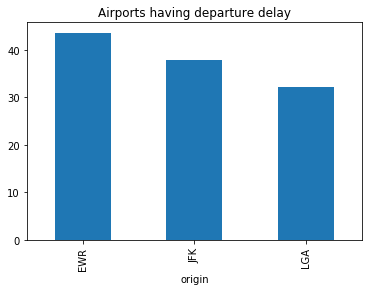

In [10]:
#1.Which airports are the worst to fly out of based on departure delay--- EWR
airport_dep_delay['Dep_delay'].plot(kind='bar', title='Airports having departure delay')

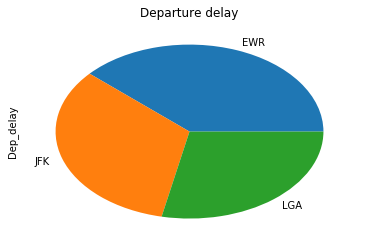

In [13]:
airport_dep_delay['Dep_delay'].plot(kind='pie', title='Departure delay')

In [14]:
airport_dep_delay['Dep_delay'].describe()

count     3.000000
mean     37.860819
std       5.717012
min      32.189333
25%      34.980081
50%      37.770828
75%      40.696562
max      43.622295
Name: Dep_delay, dtype: float64

In [15]:
airport_dep_delay['On_or_before_schd_dep_time'] = (airport_dep_delay[False] / airport_dep_delay['Departing_flights_count'])*100
airport_dep_delay.sort_values('On_or_before_schd_dep_time', ascending=False)
airport_dep_delay[0:]

delayed,False,True,Departing_flights_count,Dep_delay,On_or_before_schd_dep_time
origin,,,,,
EWR,68124,52711,120835,43.622295,56.377705
JFK,69248,42031,111279,37.770828,62.229172
LGA,70972,33690,104662,32.189333,67.810667


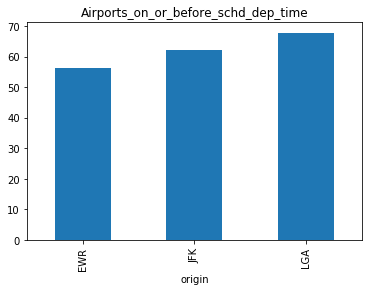

In [16]:
#2.Which airports are the best to fly out of based on departure delay---LGA
airport_dep_delay['On_or_before_schd_dep_time'].plot(kind='bar', title='Airports_on_or_before_schd_dep_time')

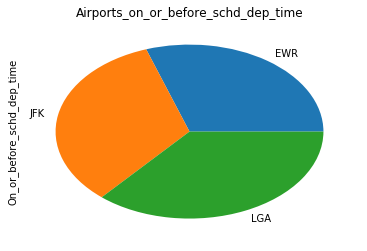

In [17]:
airport_dep_delay['On_or_before_schd_dep_time'].plot(kind='pie', title='Airports_on_or_before_schd_dep_time')

In [18]:
airport_dep_delay['On_or_before_schd_dep_time'].describe()

count     3.000000
mean     62.139181
std       5.717012
min      56.377705
25%      59.303438
50%      62.229172
75%      65.019919
max      67.810667
Name: On_or_before_schd_dep_time, dtype: float64

In [19]:
#Airport wise arrival delay
flights_df['delayed'] = flights_df['arr_delay'].apply(lambda x: x >0)
airport_arr_delay=flights_df[flights_df['delayed'] == True]
airport_arr_delay['dest'].value_counts()
airport_arr_delay = flights_df.groupby(['dest','delayed']).size().unstack()
airport_arr_delay['Arriving_flights_count'] = (airport_arr_delay[True] + airport_arr_delay[False])
airport_arr_delay['Arr_delay'] = (airport_arr_delay[True] / airport_arr_delay['Arriving_flights_count'])*100
airport_arr_delay[0:]
airport_arr_delayed=airport_arr_delay.sort_values('Arr_delay', ascending=False).head(10)
airport_arr_delayed[0:] #Top 10 airports with worst arrival delay record.


delayed,False,True,Arriving_flights_count,Arr_delay
dest,,,,
CAE,29.0,87.0,116.0,75.000000
JAC,8.0,17.0,25.0,68.000000
ANC,3.0,5.0,8.0,62.500000
TUL,122.0,193.0,315.0,61.269841
EYW,7.0,10.0,17.0,58.823529
OKC,145.0,201.0,346.0,58.092486
HDN,7.0,8.0,15.0,53.333333
SMF,134.0,150.0,284.0,52.816901
CAK,412.0,452.0,864.0,52.314815


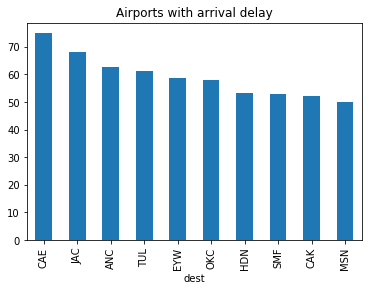

In [20]:
#1.Which airports are the worst to fly in based on arrival delay-CAE
airport_arr_delayed['Arr_delay'].plot(kind='bar', title='Airports with arrival delay')


In [24]:
airport_arr_delay['On_or_before_schd_arr_time'] = (airport_arr_delay[False] / airport_arr_delay['Arriving_flights_count'])*100
airport_arr_delayed=airport_arr_delay.sort_values('Arr_delay', ascending=False).head(10)
airport_arr_delayed[0:] #Top 10 airports with least arrival delay.

delayed,False,True,Arriving_flights_count,Arr_delay,On_or_before_schd_arr_time
dest,,,,,
MVY,163.0,58.0,221.0,26.244344,73.755656
SNA,586.0,239.0,825.0,28.969697,71.030303
BOS,10765.0,4743.0,15508.0,30.584215,69.415785
PSP,13.0,6.0,19.0,31.578947,68.421053
SEA,2654.0,1269.0,3923.0,32.347693,67.652307
BDL,299.0,144.0,443.0,32.505643,67.494357
STT,352.0,170.0,522.0,32.567050,67.432950
MIA,7873.0,3855.0,11728.0,32.870055,67.129945
DFW,5862.0,2876.0,8738.0,32.913710,67.086290


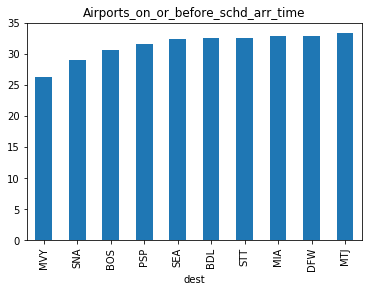

In [25]:
#1.Which airports are the best to fly in based on arrival delay-MVY
airport_arr_delayed['Arr_delay'].plot(kind='bar', title='Airports_on_or_before_schd_arr_time')


In [26]:
#airports experience the maximum cancellations
#Fitering dataset for flights meeting cancellation crietria
flights_df = pd.read_csv(flight_data)
flights_df_filtered_airport = flights_df[flights_df.dep_time.isnull() & flights_df.arr_time.isnull() & flights_df.dep_delay.isnull() & flights_df.arr_delay.isnull() & flights_df.air_time.isnull()]

#Grouping by carrier and getting the count of cancelled flights
flights_df_filtered_grouped = flights_df_filtered_airport.groupby([flights_df_filtered_airport.origin]).size().reset_index(name='Cancelled_Flights')
flights_df_filtered_grouped

#Grouping by carrier to find the total flight count for each carrier
flights_df_filtered_grouped_total = flights_df.groupby([flights_df.origin]).size().reset_index(name='Total_Flights')
flights_df_filtered_grouped_total

#Merging both the dataframes
flight_df_merged = pd.merge(flights_df_filtered_grouped, flights_df_filtered_grouped_total, on='origin', how='right')

#Calculating Percentage_Cancellation 
flight_df_merged['Percentage_Cancellation_with_origin'] = (flight_df_merged.Cancelled_Flights/flight_df_merged.Total_Flights)*100
flight_df_merged[0:]


,origin,Cancelled_Flights,Total_Flights,Percentage_Cancellation_with_origin
0,EWR,3239,120835,2.680515
1,JFK,1863,111279,1.674170
2,LGA,3153,104662,3.012555


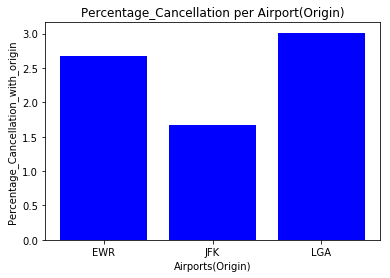

In [27]:
#Plotting Percentage_Cancellation per (Origin) Airport
ind = np.arange(len(flight_df_merged.origin))
plt.bar(ind, flight_df_merged.Percentage_Cancellation_with_origin, color="blue")
plt.ylabel('Percentage_Cancellation_with_origin')
plt.xlabel('Airports(Origin)')
plt.title('Percentage_Cancellation per Airport(Origin)')
plt.xticks(ind, flight_df_merged.origin)
plt.show()
#airports(origin) experience the maximum cancellations --LGA

In [29]:
#airports(destinaltion) experience the maximum cancellations
#Fitering dataset for flights meeting cancellation crietria
flights_df = pd.read_csv(flight_data)
flights_df_filtered_airport = flights_df[flights_df.dep_time.isnull() & flights_df.arr_time.isnull() & flights_df.dep_delay.isnull() & flights_df.arr_delay.isnull() & flights_df.air_time.isnull()]

#Grouping by carrier and getting the count of cancelled flights
flights_df_filtered_grouped = flights_df_filtered_airport.groupby([flights_df_filtered_airport.dest]).size().reset_index(name='Cancelled_Flights')
flights_df_filtered_grouped

#Grouping by carrier to find the total flight count for each carrier
flights_df_filtered_grouped_total = flights_df.groupby([flights_df.dest]).size().reset_index(name='Total_Flights')
flights_df_filtered_grouped_total

#Merging both the dataframes
flight_df_merged = pd.merge(flights_df_filtered_grouped, flights_df_filtered_grouped_total, on='dest', how='right')

#Calculating Percentage_Cancellation 
flight_df_merged['Percentage_Cancellation_with_destination'] = (flight_df_merged.Cancelled_Flights/flight_df_merged.Total_Flights)*100
flight_df_merged_sorted= flight_df_merged.sort_values('Percentage_Cancellation_with_destination', ascending=False).head(10)
flight_df_merged_sorted[0:] #Top 10 airports (destination) with most cancellations


,dest,Cancelled_Flights,Total_Flights,Percentage_Cancellation_with_destination
46,LGA,1.0,1,100.000000
42,JAC,3.0,25,12.000000
17,CHO,6.0,52,11.538462
6,BHM,25.0,297,8.417508
97,TYS,52.0,631,8.240887
24,DAY,123.0,1525,8.065574
15,CAE,9.0,116,7.758621
52,MHT,77.0,1009,7.631318
28,DSM,41.0,569,7.205624
4,BDL,31.0,443,6.997743


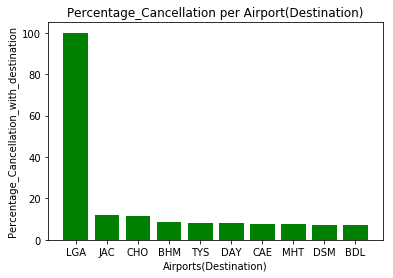

In [30]:
#Plotting Percentage_Cancellation per (Destination) Airport
ind = np.arange(len(flight_df_merged_sorted.dest))
plt.bar(ind, flight_df_merged_sorted.Percentage_Cancellation_with_destination, color="green")
plt.ylabel('Percentage_Cancellation_with_destination')
plt.xlabel('Airports(Destination)')
plt.title('Percentage_Cancellation per Airport(Destination)')
plt.xticks(ind, flight_df_merged_sorted.dest)
plt.show()

#airports(destination) experience the maximum cancellations --LGA

In [31]:
#Maximum no. of departures handled from an airport
flights_df = pd.read_csv(flight_data)
flights_df['origin'].value_counts() 
flights_df_dep_count = flights_df.groupby(['origin'])

#Grouping by origin and getting the no. of departures/airport
flights_df_dep_count = flights_df.groupby([flights_df.origin]).size().reset_index(name='Num_of_departures')
flights_df_dep_count

,origin,Num_of_departures
0,EWR,120835
1,JFK,111279
2,LGA,104662


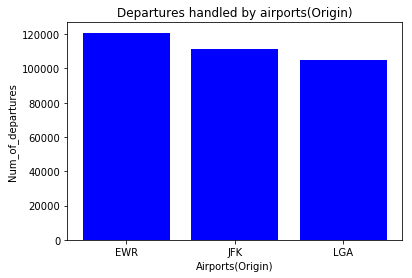

In [32]:
#Maximum no. of departures handled by an airport---EWR
ind = np.arange(len(flights_df_dep_count.origin))
plt.bar(ind, flights_df_dep_count.Num_of_departures, color="blue")
plt.ylabel('Num_of_departures')
plt.xlabel('Airports(Origin)')
plt.title('Departures handled by airports(Origin)')
plt.xticks(ind, flights_df_dep_count.origin)
plt.show()


In [33]:
#Maximum no. of arrivals handled from an airport
flights_df = pd.read_csv(flight_data)
flights_df['dest'].value_counts() 
flights_df_dep_count = flights_df.groupby(['dest'])
#Grouping by destination and getting the no. of departures/airport
flights_df_arr_count = flights_df.groupby([flights_df.dest]).size().reset_index(name='Num_of_arrivals')
flights_df_arr_count_sorted= flights_df_arr_count.sort_values('Num_of_arrivals', ascending=False).head(10)
flights_df_arr_count_sorted[0:] 


,dest,Num_of_arrivals
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


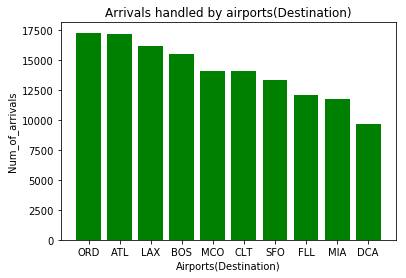

In [34]:
#Maximum no. of arrivals handled by an airport---ORD
ind = np.arange(len(flights_df_arr_count_sorted.dest))
plt.bar(ind, flights_df_arr_count_sorted.Num_of_arrivals, color="green")
plt.ylabel('Num_of_arrivals')
plt.xlabel('Airports(Destination)')
plt.title('Arrivals handled by airports(Destination)')
plt.xticks(ind, flights_df_arr_count_sorted.dest)
plt.show()
